In [5]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

In [6]:
url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
data = load_data(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [8]:
def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

In [9]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [10]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [11]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [13]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.RocCurveDisplay.from_estimator(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [21]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

## Start calling above functions one by one and see the output
Data Loading

In [15]:
#url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
#data = load_data(url)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Train-Test Split

In [16]:
target_column = 'class'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

## Model Training 
(Basic classifier, as here idea is not to create the best model however focus is on MLFlow model serving)

In [17]:
model = training_basic_classifier(X_train,y_train)

C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## See the prediction outcome

In [18]:
y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60709915e-01 3.92890864e-02 9.98742885e-07]
 [9.34700356e-01 6.52990440e-02 5.99757335e-07]
 [9.70974126e-01 2.90256148e-02 2.58837470e-07]
 [9.54954101e-01 4.50434171e-02 2.48153012e-06]
 [1.74820670e-04 1.07984610e-01 8.91840570e-01]
 [1.59421046e-

## print some metrics

In [19]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
run_metrics

{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'entropy': 0.17}

## Generate Confusion Matrix

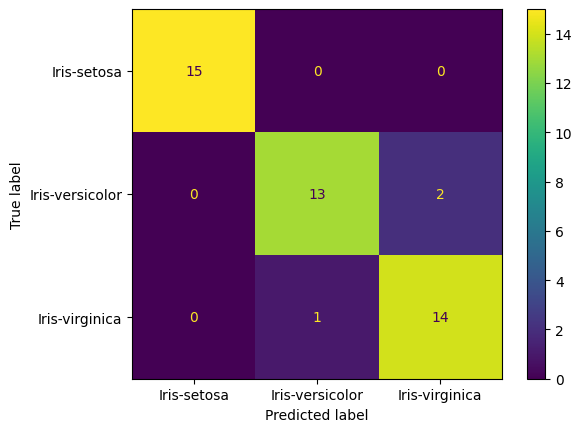

In [22]:
create_confusion_matrix_plot(model, X_test, y_test)

## Define create_experiment function to track your model experiment within MLFlow

In [23]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

## Start Mlflow server
Prefer to run it from command line

mlflow ui This will launch mlflow UI in the browser and you can access it using localhost:5000 but this uses file as backend to store experiments and model artifacts. It does not support model registry functionality.

To use model registry, you need to have some backend database other than the file system. Ex mysql, sqlite or any other DB mentioned in mlflow docs under backend storage. Refer: https://www.mlflow.org/docs/latest/tracking.html?highlight=scenario#how-runs-and-artifacts-are-recorded

In this tutorial , we will use sqlite as backend, so Now run this command to start mlflow with backend.
### mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000

## Execute the create_experiment function and log experiment

In [24]:
from datetime import datetime
experiment_name = "iris_classifier_"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\pydantic\_internal\_fields.py:160: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\pydantic\_internal\_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
2024/05/01 18:16:27 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_01-05-24' does not exist. Creating a new experiment.


Run - iris_classifier_01-05-24 is logged to Experiment - iris_classifier_01-05-24


In [25]:
import mlflow
logged_model = 'runs:/fbbdb231146e4ea88a3b135d1e9eea5c/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

## Adding an MLflow Model to the Model Registry
Reference: https://www.mlflow.org/docs/latest/model-registry.html

There are three programmatic ways to add a model to the registry. First, you can use the mlflow.<model_flavor>.log_model() method. For example, in your code:

### Method 1

In [26]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="iris-classifier")

In [27]:
experiment_name = "iris_classifier_method-1" #+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_method-1" #+str(datetime.now().strftime("%d-%m-%y"))
create_exp_and_register_model(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

2024/05/01 18:22:55 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_method-1' does not exist. Creating a new experiment.
C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'iris-classifier'.
2024/05/01 18:23:05 INFO mlflow.store.model_registry.abstract_sto

## Fetching an MLflow Model from the Model Registry
### Fetch a specific model version

In [28]:
import mlflow.pyfunc

model_name = "iris-classifier"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60709915e-01 3.92890864e-02 9.98742885e-07]
 [9.34700356e-01 6.52990440e-02 5.99757335e-07]
 [9.70974126e-01 2.90256148e-02 2.58837470e-07]
 [9.54954101e-01 4.50434171e-02 2.48153012e-06]
 [1.74820670e-04 1.07984610e-01 8.91840570e-01]
 [1.59421046e-

## Fetch the latest model version in a specific stage

To fetch a model version by stage, simply provide the model stage as part of the model URI, and it will fetch the most recent version of the model in that stage.

### Transitioning an MLflow Model’s Stage

In [29]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier",
    version=1,
    stage="Production"
)

<ModelVersion: aliases=[], creation_timestamp=1714567985620, current_stage='Production', description='', last_updated_timestamp=1714568202240, name='iris-classifier', run_id='76d8b80435a2493cbe305b365fedbb56', run_link='', source=('file:///D:/New '
 'folder/artifacts/6/76d8b80435a2493cbe305b365fedbb56/artifacts/model'), status='READY', status_message='', tags={}, user_id='', version='1'>

In [30]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict([[6.7,3.3,5.7,2.1]])
print(y_pred)
y_pred_prob = model.predict_proba([[6.7,3.3,5.7,2.1]])
print(y_pred_prob)

['Iris-virginica']
[[2.92689634e-05 4.04381691e-02 9.59532562e-01]]


C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mudassarali.Sayyed\AppData\Local\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
import requests

inference_request = {
        "dataframe_records": [[6.7,3.3,5.7,2.1]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

ConnectionError: HTTPConnectionPool(host='localhost', port=1234): Max retries exceeded with url: /invocations (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002CA1C622910>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [38]:
mlflow.set_tracking_uri('http://localhost:5000')